In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')

In [87]:
amd_df = pd.read_csv("AMD (1980 -11.07.2023).csv")
asus_df = pd.read_csv("ASUS (2000 - 11.07.2023).csv")
intel_df = pd.read_csv("INTEL (1980 - 11.07.2023).csv")
msi_df = pd.read_csv("MSI (2023 - 08.04.2024).csv")
nvidia_df = pd.read_csv("NVIDIA (1999 -11.07.2023).csv")

In [88]:
print(amd_df.head())
print(amd_df.info())
print(amd_df.describe())

         Date  Open      High       Low     Close  Adj Close  Volume
0  1980-03-18   0.0  3.125000  2.937500  3.031250   3.031250  727200
1  1980-03-19   0.0  3.083333  3.020833  3.041667   3.041667  295200
2  1980-03-20   0.0  3.062500  3.010417  3.010417   3.010417  159600
3  1980-03-21   0.0  3.020833  2.906250  2.916667   2.916667  130800
4  1980-03-24   0.0  2.916667  2.635417  2.666667   2.666667  436800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10919 entries, 0 to 10918
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10919 non-null  object 
 1   Open       10919 non-null  float64
 2   High       10919 non-null  float64
 3   Low        10919 non-null  float64
 4   Close      10919 non-null  float64
 5   Adj Close  10919 non-null  float64
 6   Volume     10919 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 597.3+ KB
None
               Open          High           Low  

In [89]:
amd_viz = amd_df.copy()

In [90]:
print(asus_df.head())
print(asus_df.info())
print(asus_df.describe())

         Date        Open        High         Low       Close  Adj Close  \
0  2000-01-05  438.747223  446.535675  436.151154  438.747223  89.092613   
1  2000-01-06  440.045380  447.833862  436.151154  437.449310  88.829048   
2  2000-01-07  432.256927  433.555084  425.766632  428.362701  86.983925   
3  2000-01-10  434.853271  454.324158  434.853271  450.429901  91.464920   
4  2000-01-11  463.410767  463.410767  442.641449  443.939606  90.146988   

         Volume  
0  6.106176e+09  
1  6.545984e+09  
2  4.764317e+09  
3  1.199988e+10  
4  1.423350e+10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5869 entries, 0 to 5868
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5869 non-null   object 
 1   Open       5746 non-null   float64
 2   High       5746 non-null   float64
 3   Low        5746 non-null   float64
 4   Close      5746 non-null   float64
 5   Adj Close  5746 non-null   float64
 6   Volu

In [91]:
asus_viz = asus_df.copy()

In [92]:
print(intel_df.head())
print(intel_df.info())
print(intel_df.describe())

         Date      Open      High       Low     Close  Adj Close    Volume
0  1980-03-18  0.325521  0.328125  0.322917  0.322917   0.183718  17068800
1  1980-03-19  0.330729  0.335938  0.330729  0.330729   0.188162  18508800
2  1980-03-20  0.330729  0.334635  0.329427  0.329427   0.187421  11174400
3  1980-03-21  0.322917  0.322917  0.317708  0.317708   0.180754  12172800
4  1980-03-24  0.316406  0.316406  0.311198  0.311198   0.177050   8966400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10919 entries, 0 to 10918
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10919 non-null  object 
 1   Open       10919 non-null  float64
 2   High       10919 non-null  float64
 3   Low        10919 non-null  float64
 4   Close      10919 non-null  float64
 5   Adj Close  10919 non-null  float64
 6   Volume     10919 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 597.3+ KB
None
             

In [93]:
intel_viz = intel_df.copy()

In [94]:
print(msi_df.head())
print(msi_df.info())
print(msi_df.describe())

         Date   Open   High    Low  Close   Adj Close   Volume
0  2023-01-03  119.0  122.5  119.0  122.5  117.785713  1688380
1  2023-01-04  122.5  122.5  121.0  122.0  117.304955  1214832
2  2023-01-05  123.0  124.0  122.5  123.5  118.747231  2223376
3  2023-01-06  123.5  124.5  123.0  124.0  119.227989   915155
4  2023-01-09  125.0  126.0  124.5  126.0  121.151016  2305489
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       298 non-null    object 
 1   Open       298 non-null    float64
 2   High       298 non-null    float64
 3   Low        298 non-null    float64
 4   Close      298 non-null    float64
 5   Adj Close  298 non-null    float64
 6   Volume     298 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.4+ KB
None
            Open        High         Low       Close   Adj Close        Volume
count  298.

In [95]:
msi_viz = msi_df.copy()

In [96]:
print(nvidia_df.head())
print(nvidia_df.info())
print(nvidia_df.describe())

         Date      Open      High       Low     Close  Adj Close    Volume
0  1999-01-25  0.442708  0.458333  0.410156  0.453125   0.415743  51048000
1  1999-01-26  0.458333  0.467448  0.411458  0.417969   0.383487  34320000
2  1999-01-27  0.419271  0.429688  0.395833  0.416667   0.382293  24436800
3  1999-01-28  0.416667  0.419271  0.412760  0.415365   0.381098  22752000
4  1999-01-29  0.415365  0.416667  0.395833  0.395833   0.363177  24403200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6154 entries, 0 to 6153
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6154 non-null   object 
 1   Open       6154 non-null   float64
 2   High       6154 non-null   float64
 3   Low        6154 non-null   float64
 4   Close      6154 non-null   float64
 5   Adj Close  6154 non-null   float64
 6   Volume     6154 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB
None
              O

In [97]:
nvidia_viz = nvidia_df.copy()

Exploratory Data Analysis

In [98]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']

AMD:

In [99]:
amd_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Figure size 1000x600 with 0 Axes>

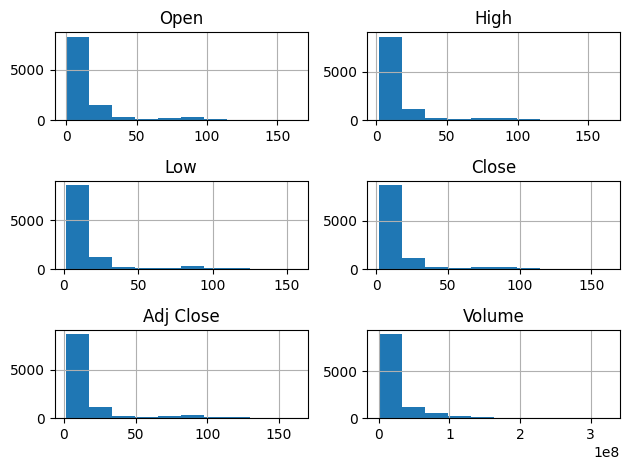

In [100]:
plt.figure(figsize=(10,6))
amd_df.hist(features)
plt.tight_layout()
plt.show()

Asus:

In [101]:
asus_df.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [102]:
asus_df.dropna(inplace=True)

<Figure size 2000x2000 with 0 Axes>

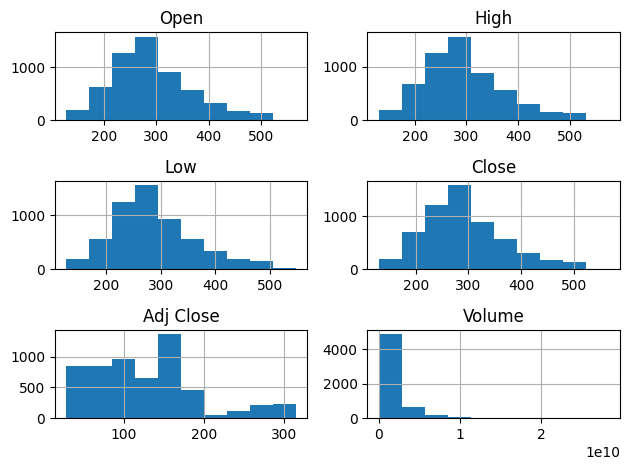

In [103]:
plt.figure(figsize=(20,20))
asus_df.hist(features)
plt.tight_layout()
plt.show()

Intel:

In [104]:
intel_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Figure size 2000x2000 with 0 Axes>

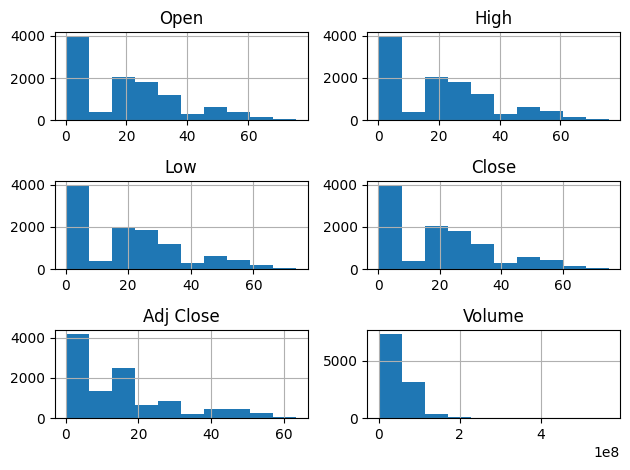

In [105]:
plt.figure(figsize=(20, 20))
intel_df.hist(features)
plt.tight_layout()
plt.show()

MSI:

In [106]:
msi_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Figure size 2000x2000 with 0 Axes>

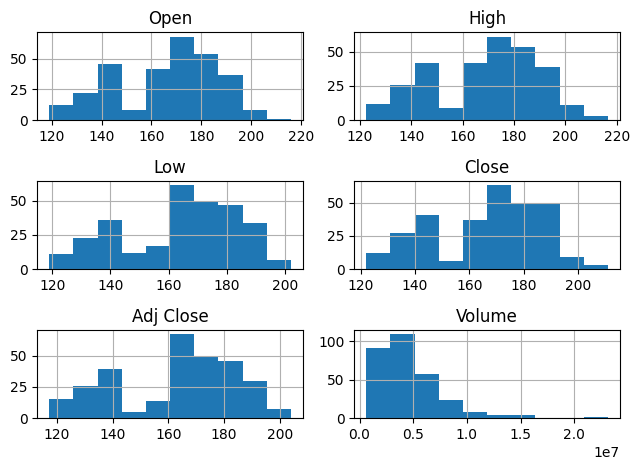

In [107]:
plt.figure(figsize=(20,20))
msi_df.hist(features)
plt.tight_layout()
plt.show()

Nvidia:

In [108]:
nvidia_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Figure size 2000x2000 with 0 Axes>

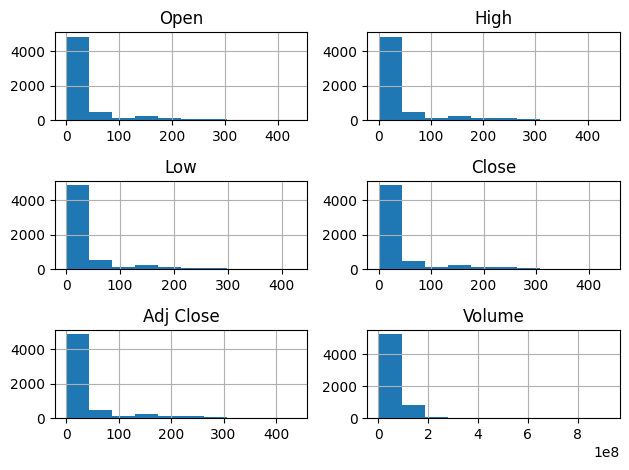

In [109]:
plt.figure(figsize=(20,20))
nvidia_df.hist(features)
plt.tight_layout()
plt.show()

Train Test and Splitting Data

In [110]:
amd_train, amd_test = train_test_split(amd_df, test_size = 0.2, random_state=0)
asus_train, asus_test = train_test_split(asus_df, test_size = 0.2, random_state=0)
intel_train, intel_test = train_test_split(intel_df, test_size = 0.2, random_state=0)
msi_train, msi_test = train_test_split(msi_df, test_size = 0.2, random_state=0)
nvidia_train, nvidia_test = train_test_split(nvidia_df, test_size = 0.2, random_state=0)

In [111]:
amd_test_pred = amd_test.copy()
asus_test_pred = asus_test.copy()
intel_test_pred = intel_test.copy()
msi_test_pred = msi_test.copy()
nvidia_test_pred = nvidia_test.copy()

In [112]:
x_col = ['Open', 'High', 'Low', 'Volume']

In [113]:
x_train_amd = amd_train[x_col].values
x_test_amd = amd_test[x_col].values

In [114]:
x_train_intel = intel_train[x_col]
x_test_intel = intel_test[x_col]

In [115]:
x_train_asus = asus_train[x_col]
x_test_asus = asus_test[x_col]

In [116]:
x_train_msi = msi_train[x_col]
x_test_msi = msi_test[x_col]

In [117]:
x_train_nvidia = nvidia_train[x_col]
x_test_nvidia = nvidia_test[x_col]

In [118]:
y_train_amd = amd_train['Close'].values
y_train_asus = asus_train['Close'].values
y_train_intel = intel_train['Close'].values
y_train_msi = msi_train['Close'].values
y_train_nvidia = nvidia_train['Close'].values

In [119]:
y_test_amd = amd_test['Close'].values
y_test_asus = asus_test['Close'].values
y_test_intel = intel_test['Close'].values
y_test_msi = msi_test['Close'].values
y_test_nvidia = nvidia_test['Close'].values

Performance Metrics:

In [120]:
def perform(y_test, y_pred):
    print("MSE",round(mean_squared_error(y_test,y_pred), 3))
    print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
    print("MSLE",round(mean_squared_log_error(y_test,y_pred)), 3)
    print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
    print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
    print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

Linear Regression for AMD

In [121]:
model_lr_amd = LinearRegression()
model_lr_amd.fit(x_train_amd, y_train_amd)

LinearRegression()

In [122]:
y_pred_amd = model_lr_amd.predict(x_test_amd)

In [123]:
perform(y_test_amd, y_pred_amd)

MSE 0.176
RMSE 0.42
MSLE 0 3
MAE 0.211
MAPE 0.017
R2 Score :  1.0


Linear Regression for Asus:

In [124]:
model_lr_asus = LinearRegression()
model_lr_asus.fit(x_train_asus, y_train_asus)

LinearRegression()

In [125]:
y_pred_asus = model_lr_asus.predict(x_test_asus)

In [126]:
perform(y_test_asus, y_pred_asus)

MSE 5.723
RMSE 2.392
MSLE 0 3
MAE 1.656
MAPE 0.006
R2 Score :  0.999


Linear Regression for Intel:

In [127]:
model_lr_intel = LinearRegression()
model_lr_intel.fit(x_train_intel, y_train_intel)

LinearRegression()

In [128]:
y_pred_intel = model_lr_intel.predict(x_test_intel)

In [129]:
perform(y_test_intel, y_pred_intel)

MSE 0.067
RMSE 0.259
MSLE 0 3
MAE 0.13
MAPE 0.007
R2 Score :  1.0


Linear Regression for MSI:

In [130]:
model_lr_msi = LinearRegression()
model_lr_msi.fit(x_train_msi, y_train_msi)

LinearRegression()

In [131]:
y_pred_msi = model_lr_msi.predict(x_test_msi)

In [132]:
perform(y_test_msi, y_pred_msi)

MSE 1.58
RMSE 1.257
MSLE 0 3
MAE 1.045
MAPE 0.006
R2 Score :  0.996


Linear Regression for Nvidia:

In [133]:
model_lr_nvidia = LinearRegression()
model_lr_nvidia.fit(x_train_nvidia, y_train_nvidia)

LinearRegression()

In [134]:
y_pred_nvidia = model_lr_nvidia.predict(x_test_nvidia)

In [135]:
perform(y_test_nvidia, y_pred_nvidia)

MSE 0.869
RMSE 0.932
MSLE 0 3
MAE 0.299
MAPE 0.01
R2 Score :  1.0


Model Visualisation:

In [136]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

AMD:

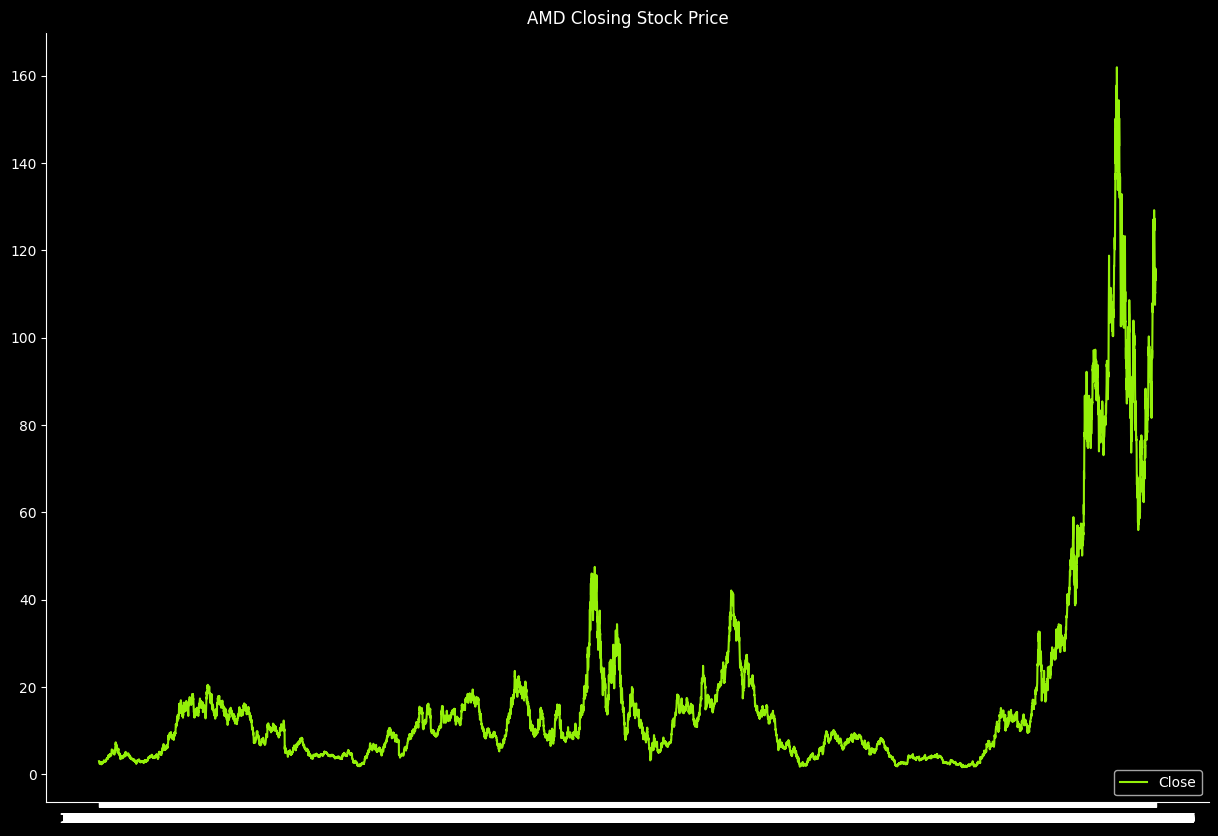

In [137]:
style()

plt.title('AMD Closing Stock Price', color="white")
plt.plot(amd_viz.Date, amd_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

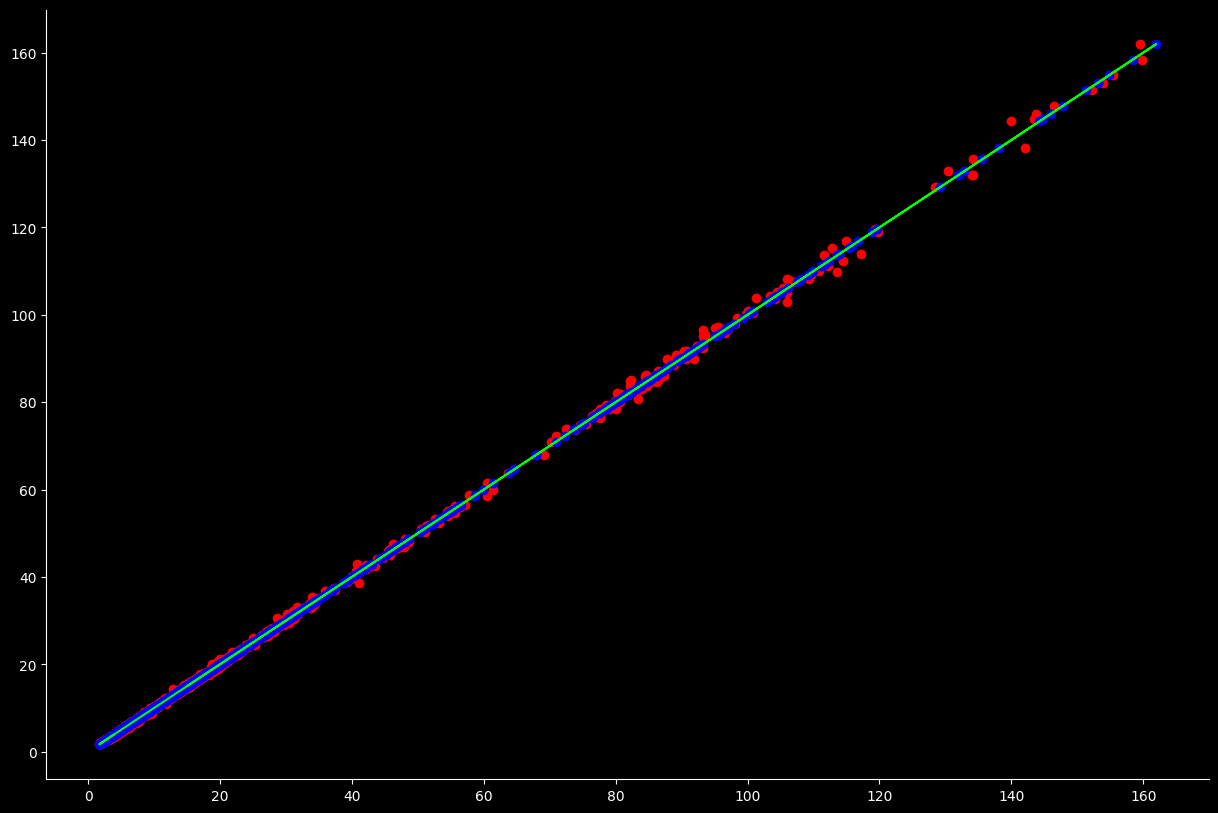

In [138]:
style()

plt.scatter(y_pred_amd, y_test_amd, color='red', marker='o')
plt.scatter(y_test_amd, y_test_amd, color='blue')
plt.plot(y_test_amd, y_test_amd, color='lime')

In [139]:
amd_test_pred['Close_Prediction'] = y_pred_amd
amd_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
1533,1986-04-11,15.250000,15.625000,15.000000,15.125000,15.125000,1444800,15.281074
10025,2019-12-18,42.790001,43.060001,42.240002,42.299999,42.299999,39083300,42.635621
7604,2010-05-07,8.300000,8.670000,7.920000,8.380000,8.380000,48469500,8.289586
1312,1985-05-24,14.312500,14.687500,14.312500,14.625000,14.625000,494200,14.479592
5976,2003-11-17,17.549999,17.559999,16.850000,17.360001,17.360001,12035800,17.145315
...,...,...,...,...,...,...,...,...
384,1981-09-24,0.000000,2.625000,2.500000,2.583333,2.583333,424200,2.750973
7706,2010-10-01,7.200000,7.260000,7.010000,7.050000,7.050000,27510600,7.110146
9749,2018-11-12,20.680000,20.850000,18.799999,19.030001,19.030001,95948200,19.777852
6225,2004-11-12,19.080000,21.100000,18.940001,21.020000,21.020000,39768600,20.091280


In [140]:
amd_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2184.0,16.947398,23.234629,1.710000,5.437500,9.859375,15.693125,161.910004
Close_Prediction,2184.0,16.942627,23.195362,1.675752,5.485419,9.799239,15.666267,159.817300


Asus:

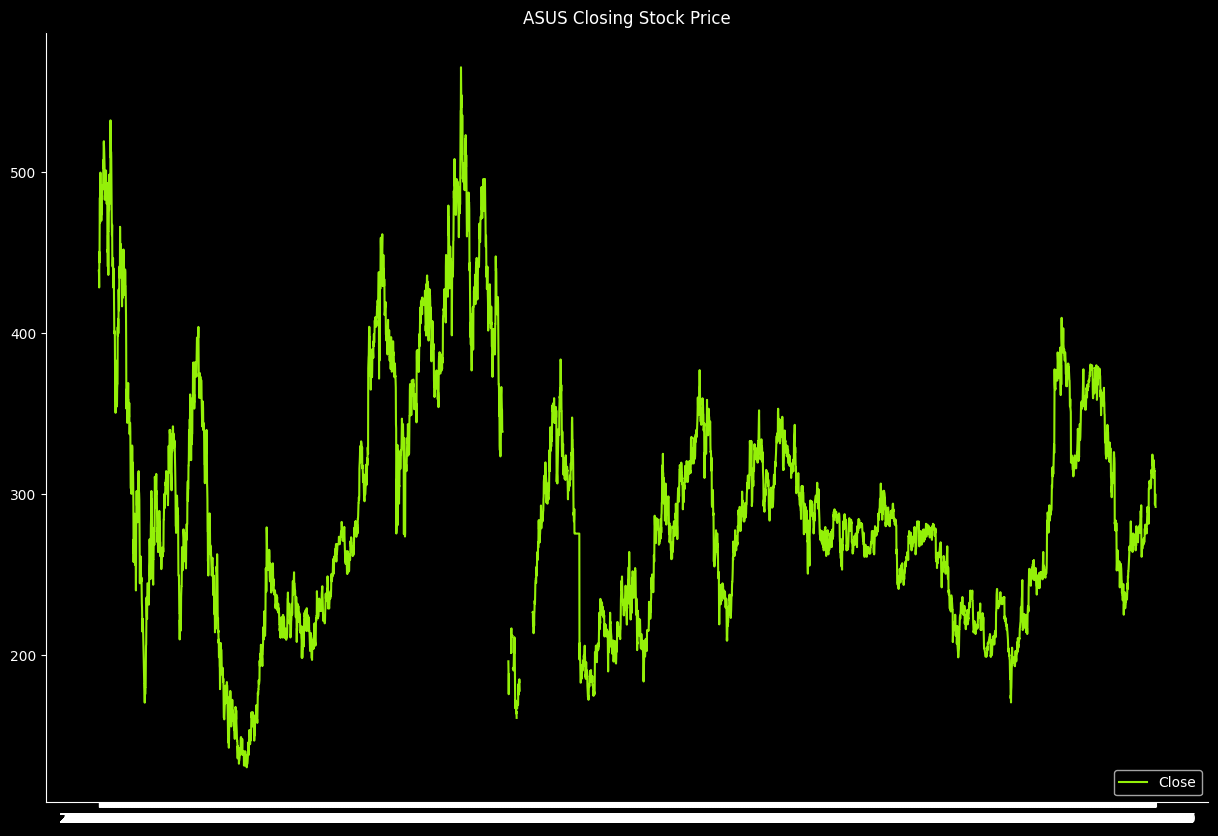

In [141]:
style()

plt.title('ASUS Closing Stock Price', color="white")
plt.plot(asus_viz.Date, asus_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

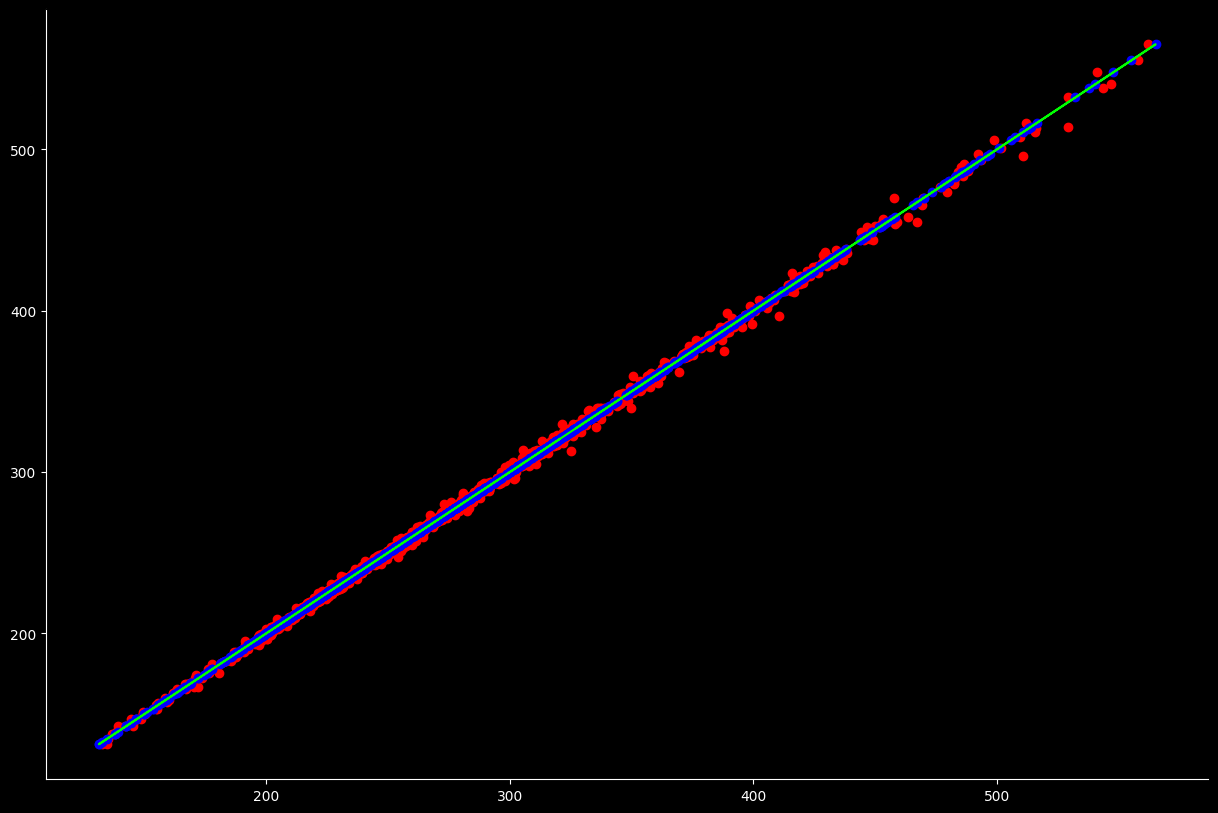

In [142]:
style()

plt.scatter(y_pred_asus, y_test_asus, color='red', marker='o')
plt.scatter(y_test_asus, y_test_asus, color='blue')
plt.plot(y_test_asus, y_test_asus, color='lime')

In [143]:
asus_test_pred['Close_Prediction'] = y_pred_asus
asus_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
3685,2014-08-01,320.000000,323.000000,320.000000,320.500000,159.744293,1.212000e+06,322.162172
5193,2020-09-24,256.000000,256.500000,251.000000,253.500000,194.035080,2.995417e+06,252.513192
4701,2018-09-14,251.000000,253.000000,250.500000,251.000000,169.493805,9.530820e+05,252.186294
4287,2017-01-05,268.500000,269.500000,267.000000,269.000000,161.263901,7.440000e+05,268.025165
2026,2007-11-21,500.737213,518.089478,495.779419,495.779419,120.610611,6.987784e+06,510.668596
...,...,...,...,...,...,...,...,...
428,2001-08-27,280.253143,282.459839,269.219543,280.253143,58.944817,4.331640e+09,273.175800
891,2003-06-05,184.260910,186.467636,180.950836,183.157562,40.604511,4.205025e+09,183.349477
2012,2007-11-01,567.667419,575.104126,547.836243,555.272949,135.083908,1.103737e+07,557.777932
727,2002-10-18,169.917252,175.434052,166.607178,174.330673,38.647671,1.028299e+10,171.284397


In [144]:
asus_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1150.0,289.886951,75.745151,131.299683,235.005150,278.00000,328.375000,565.188538
Close_Prediction,1150.0,289.847941,75.828273,132.701374,234.342256,277.54731,327.596471,561.937295


Intel:

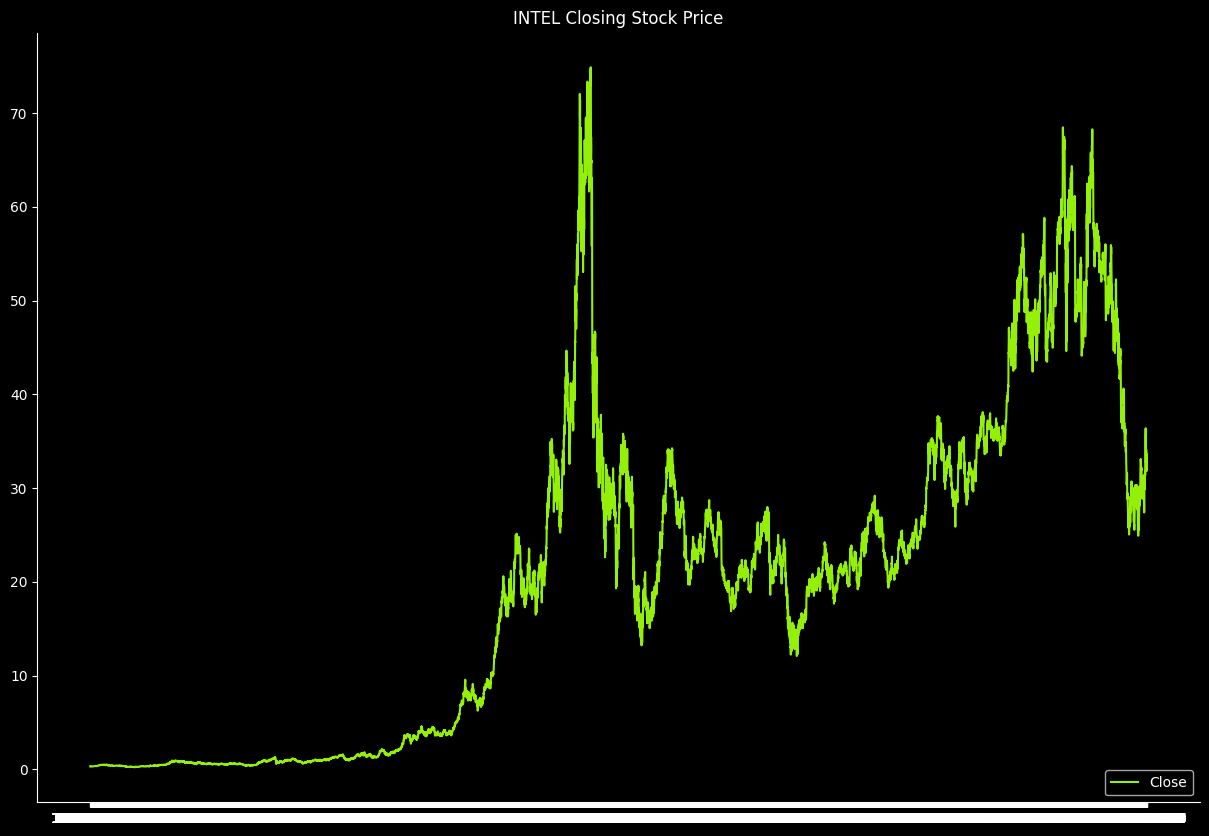

In [145]:
style()

plt.title('INTEL Closing Stock Price', color="white")
plt.plot(intel_viz.Date, intel_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

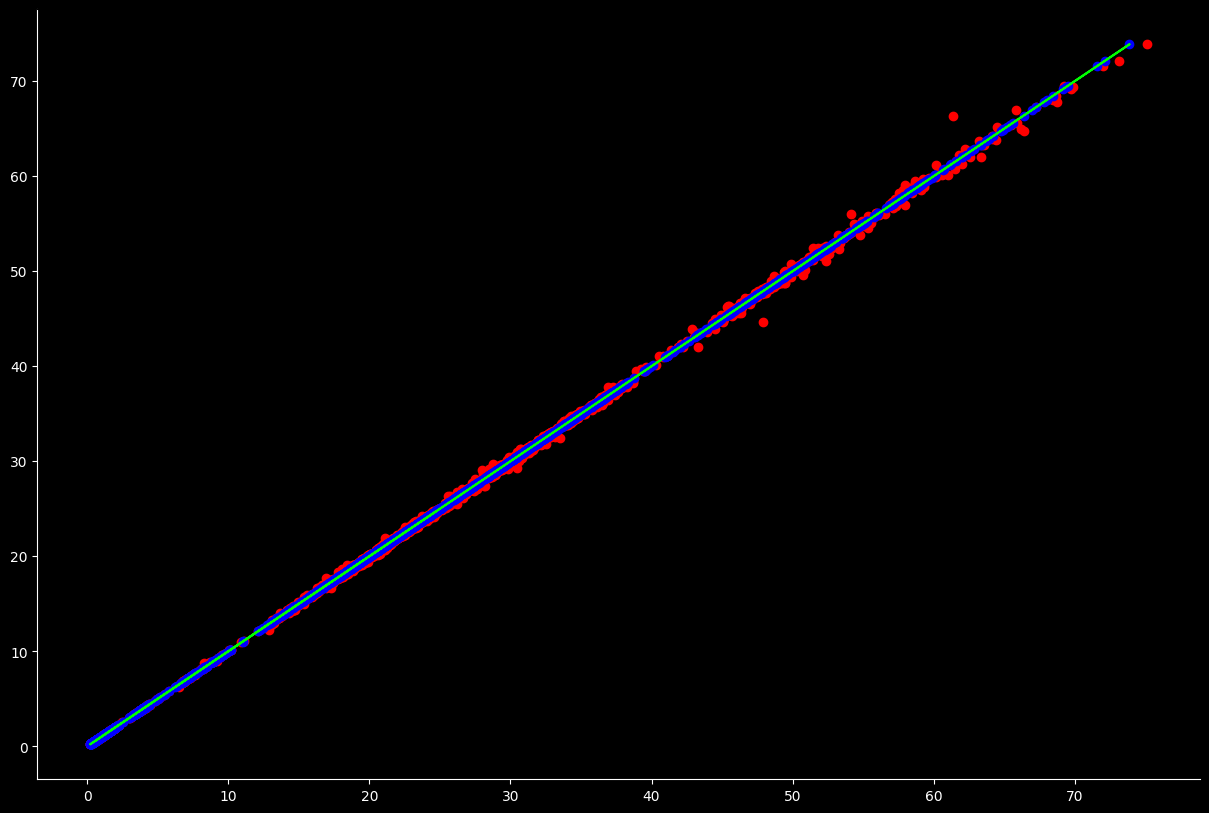

In [146]:
style()

plt.scatter(y_pred_intel, y_test_intel, color='red', marker='o')
plt.scatter(y_test_intel, y_test_intel, color='blue')
plt.plot(y_test_intel, y_test_intel, color='lime')

In [147]:
intel_test_pred['Close_Prediction'] = y_pred_intel
intel_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
1533,1986-04-11,0.583333,0.609375,0.583333,0.593750,0.337803,84648000,0.614526
10025,2019-12-18,57.389999,57.459999,56.939999,57.169998,51.457077,28261000,57.097599
7604,2010-05-07,21.260000,21.700001,20.459999,21.309999,14.291801,139360500,20.947437
1312,1985-05-24,0.567708,0.572917,0.557292,0.567708,0.322987,30086400,0.564532
5976,2003-11-17,32.400002,32.580002,31.660000,32.230000,18.891338,64927100,31.930030
...,...,...,...,...,...,...,...,...
384,1981-09-24,0.250000,0.250000,0.247396,0.247396,0.140751,20256000,0.247670
7706,2010-10-01,19.469999,20.350000,18.879999,19.320000,13.056024,41275000,19.671042
9749,2018-11-12,47.709999,47.799999,46.599998,46.650002,40.966312,24412800,46.851905
6225,2004-11-12,23.320000,23.760000,22.879999,23.690001,13.972394,92808700,23.314393


In [148]:
intel_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2184.0,20.081028,17.351907,0.216146,1.482422,20.52000,30.052499,73.875000
Close_Prediction,2184.0,20.085382,17.353094,0.214703,1.482114,20.59766,29.984756,75.118073


MSI:

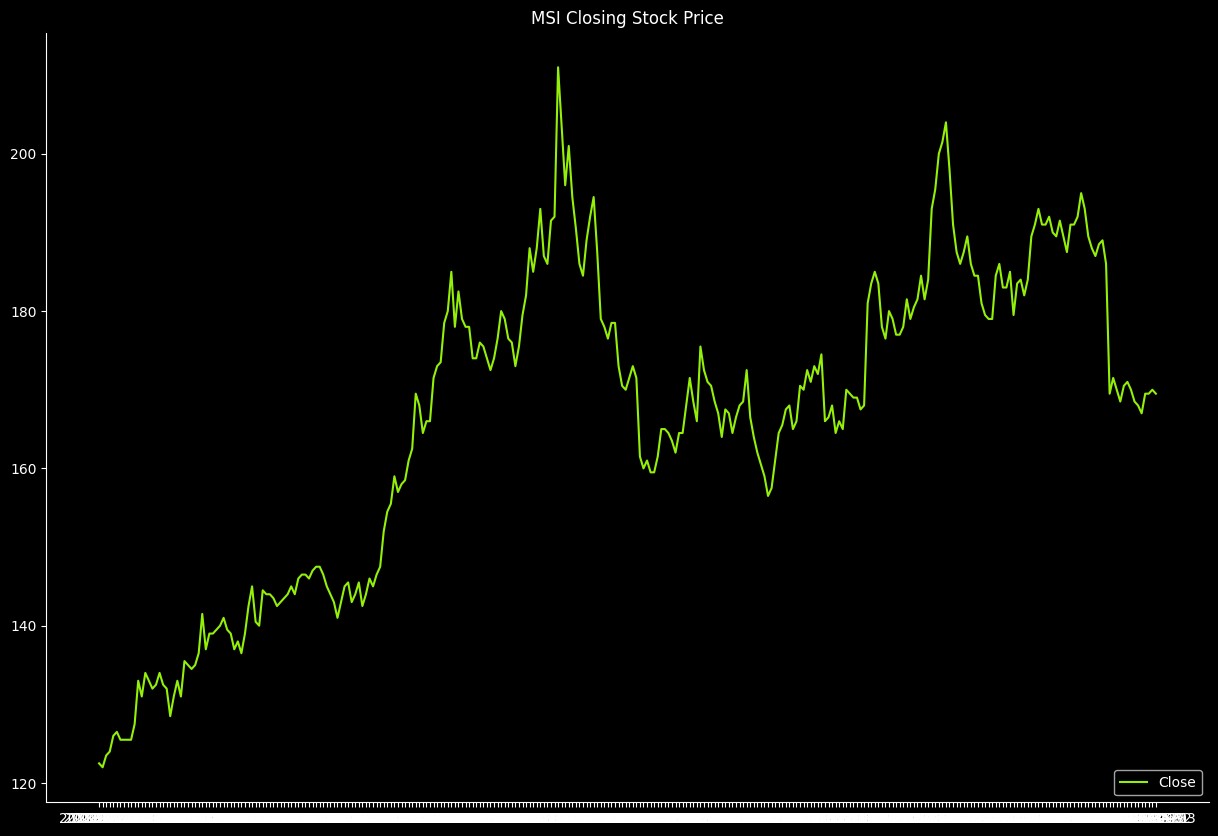

In [149]:
style()

plt.title('MSI Closing Stock Price', color="white")
plt.plot(msi_viz.Date, msi_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

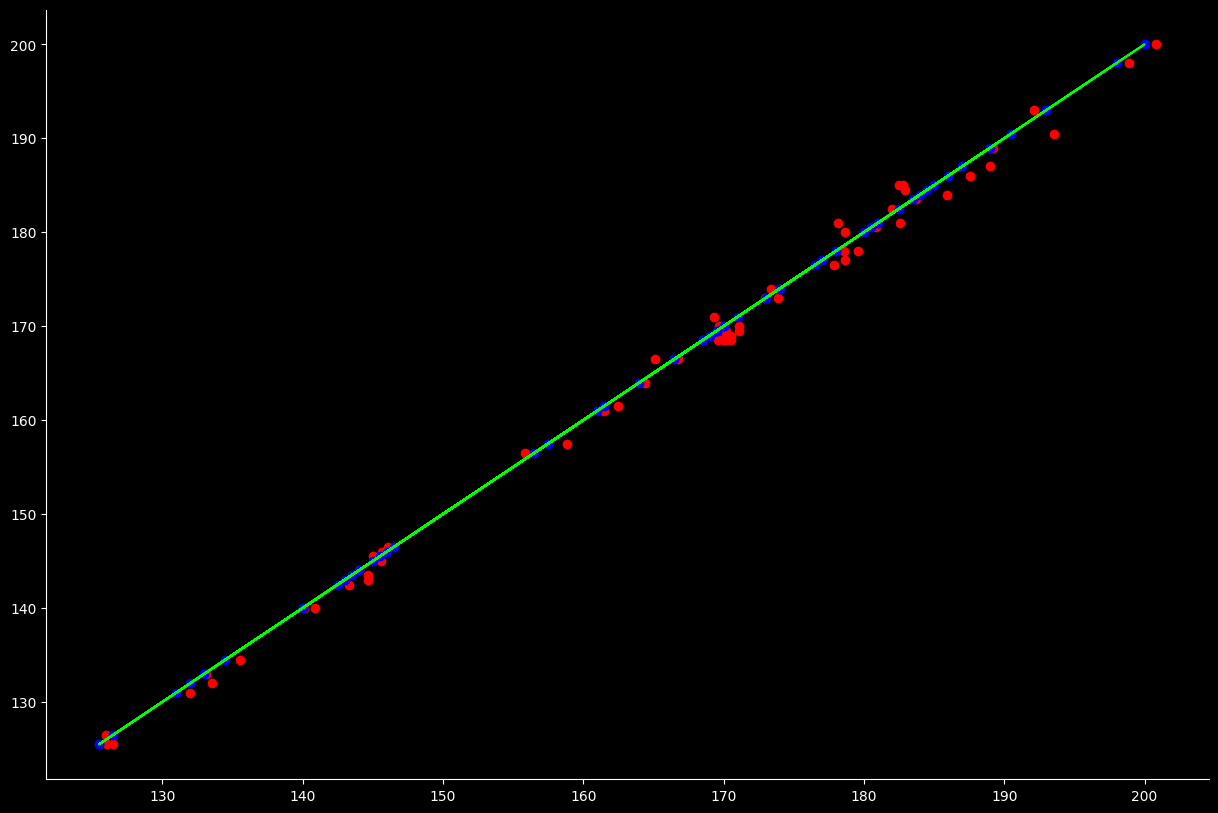

In [150]:
style()

plt.scatter(y_pred_msi, y_test_msi, color='red', marker='o')
plt.scatter(y_test_msi, y_test_msi, color='blue')
plt.plot(y_test_msi, y_test_msi, color='lime')

In [151]:
msi_test_pred['Close_Prediction'] = y_pred_msi
msi_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
111,2023-06-29,175.0,176.0,172.5,174.0,167.303787,3365766,173.992104
175,2023-09-28,167.0,167.5,163.0,164.0,164.000000,5749449,164.413891
12,2023-01-31,132.0,134.5,129.0,131.0,125.958595,4824774,131.979717
218,2023-12-01,183.5,185.0,181.0,185.0,185.000000,6640830,182.506818
205,2023-11-14,166.5,167.5,163.5,166.5,166.500000,4335055,165.120647
74,2023-05-05,145.5,145.5,142.0,142.5,137.016037,3170140,143.274758
210,2023-11-21,166.0,171.0,166.0,170.0,170.000000,4860201,169.704059
173,2023-09-26,170.5,173.0,167.5,168.5,168.500000,4680339,170.207851
189,2023-10-23,154.0,160.0,154.0,157.5,157.500000,1731478,158.850679
216,2023-11-29,170.0,183.0,169.0,181.0,181.000000,15134098,178.156681


In [152]:
msi_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,60.0,165.233333,19.795665,125.500000,145.875000,169.500000,180.625000,200.000000
Close_Prediction,60.0,165.672091,19.735436,126.016392,145.632444,170.172951,179.918704,200.803947


Nvidia:

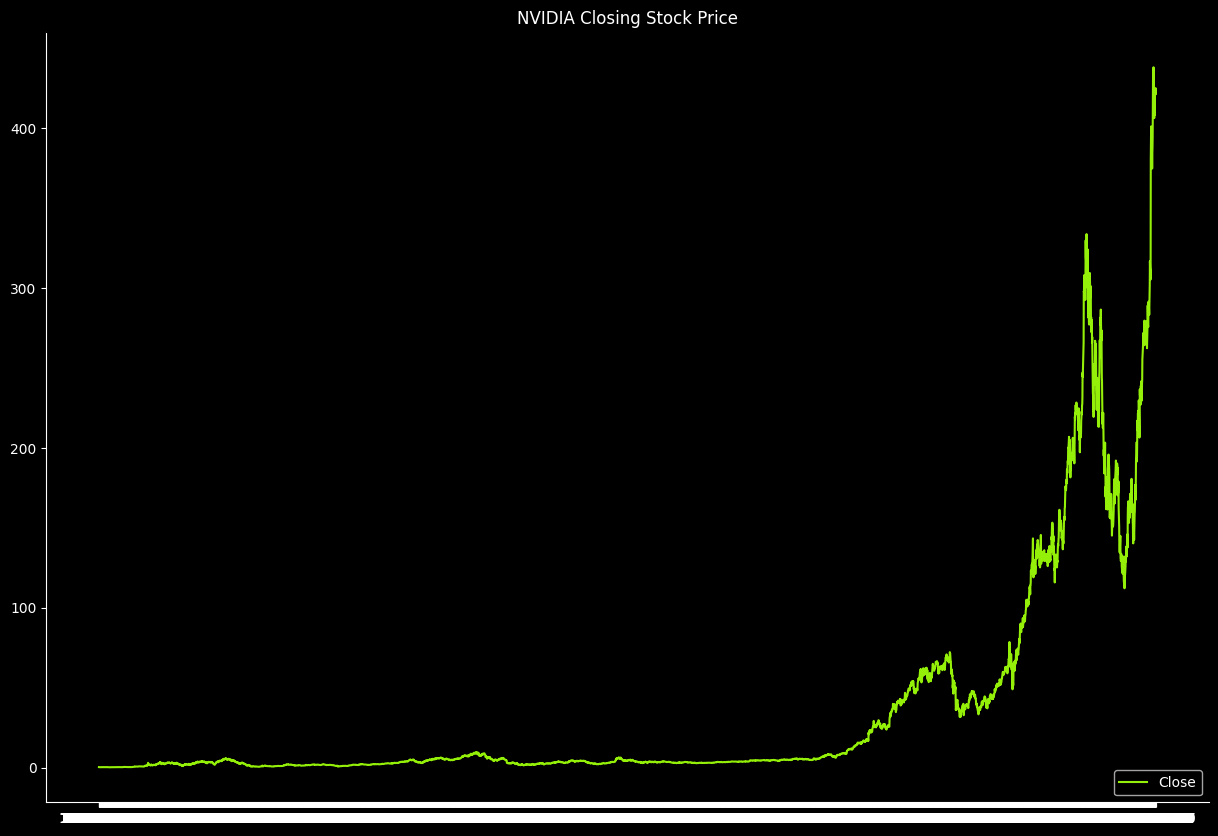

In [153]:
style()

plt.title('NVIDIA Closing Stock Price', color="white")
plt.plot(nvidia_viz.Date, nvidia_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

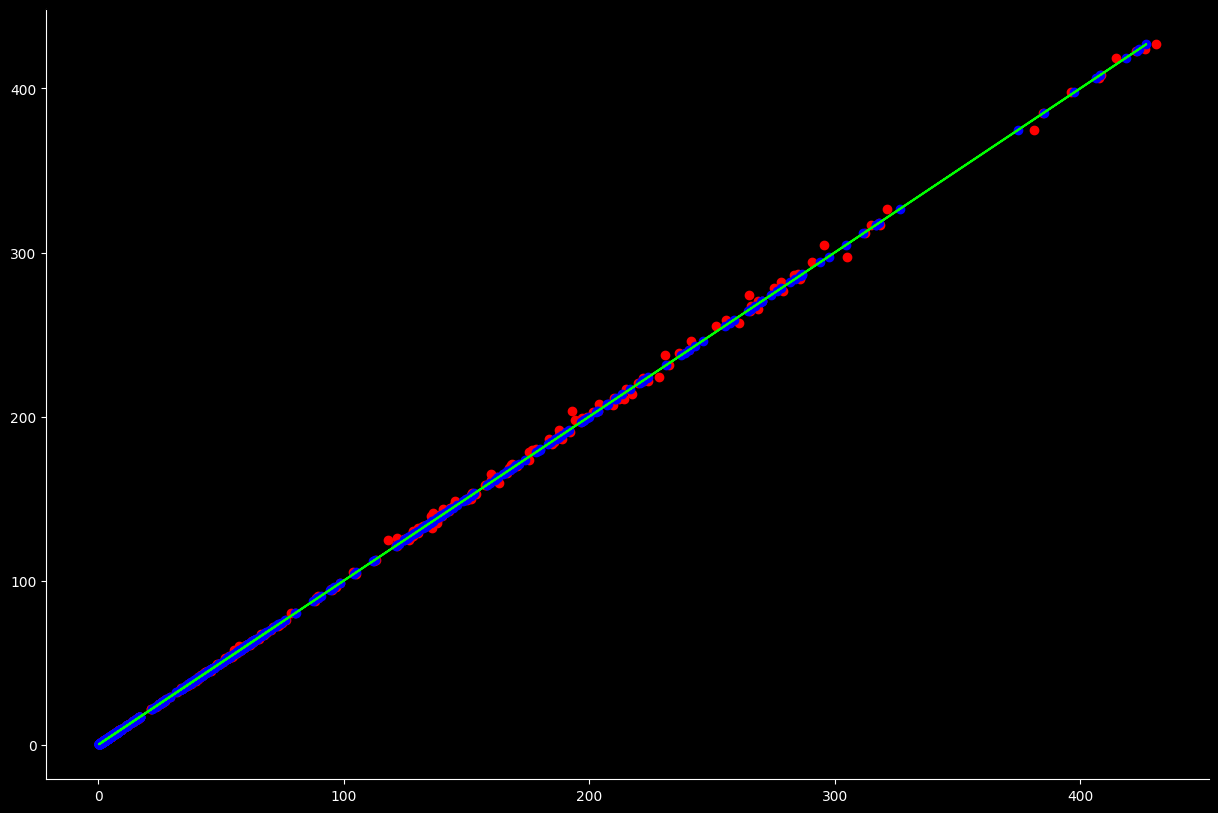

In [154]:
style()

plt.scatter(y_pred_nvidia, y_test_nvidia, color='red', marker='o')
plt.scatter(y_test_nvidia, y_test_nvidia, color='blue')
plt.plot(y_test_nvidia, y_test_nvidia, color='lime')

In [155]:
nvidia_test_pred['Close_Prediction'] = y_pred_nvidia
nvidia_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
1573,2005-04-27,1.825000,1.831667,1.765000,1.802500,1.653796,60934800,1.789001
4622,2017-06-07,37.082500,37.470001,36.924999,37.279999,36.835739,61261200,37.338970
3315,2012-03-27,3.695000,3.750000,3.687500,3.705000,3.399342,41996800,3.745064
4430,2016-08-31,15.437500,15.480000,15.290000,15.335000,15.094635,38854400,15.385861
247,2000-01-14,0.890625,0.951823,0.888021,0.915365,0.839849,60456000,0.943419
...,...,...,...,...,...,...,...,...
3141,2011-07-19,3.460000,3.562500,3.460000,3.555000,3.261717,60222400,3.552801
933,2002-10-10,0.608333,0.665833,0.608333,0.645833,0.592553,53803200,0.659610
2916,2010-08-26,2.512500,2.540000,2.450000,2.450000,2.247879,65759600,2.492068
2604,2009-06-02,2.735000,2.795000,2.662500,2.712500,2.488722,90798400,2.732157


In [156]:
nvidia_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1231.0,34.253383,68.965489,0.352865,2.587500,4.387500,34.125000,426.920013
Close_Prediction,1231.0,34.199885,68.828770,0.355930,2.595676,4.413888,33.790268,430.815160


Share Price of all Companies:

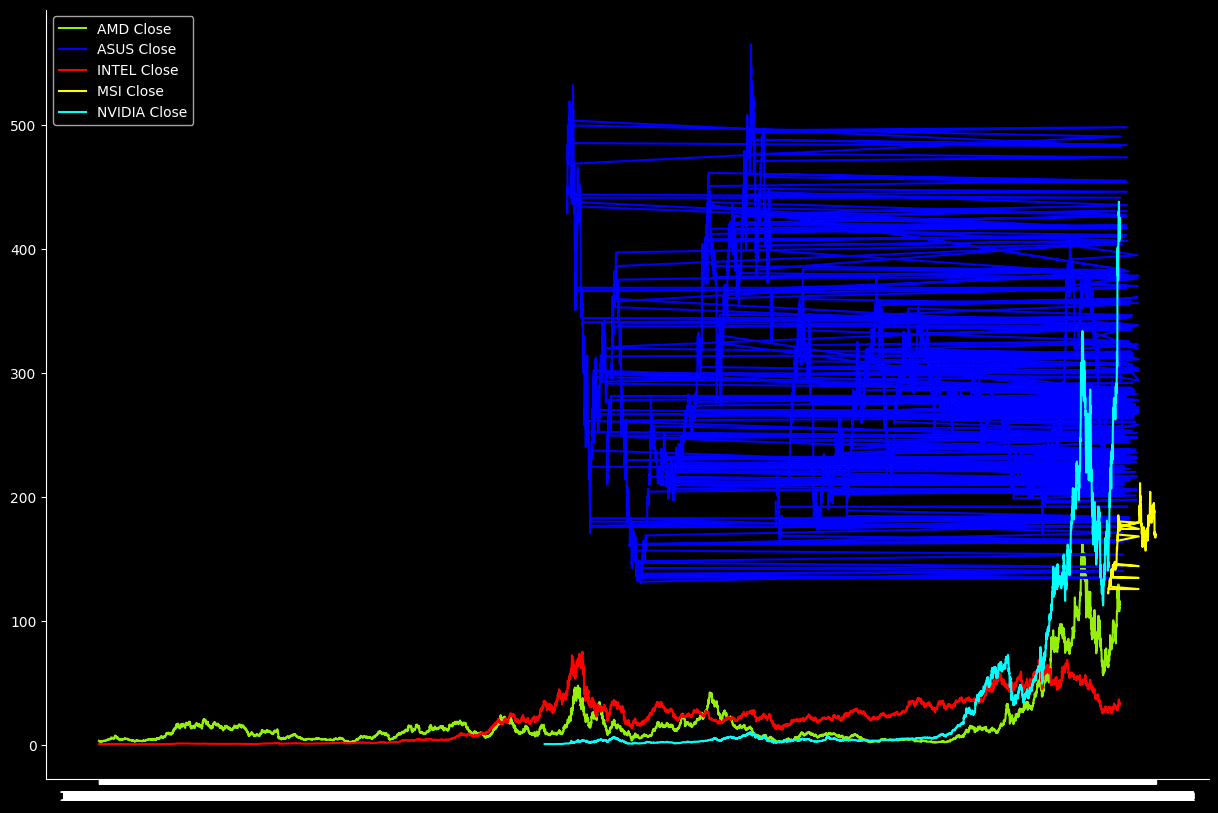

In [158]:
style()

plt.plot(amd_viz.Date, amd_viz.Close, color="#94F008")
plt.plot(asus_viz.Date, asus_viz.Close, color="blue")
plt.plot(intel_viz.Date, intel_viz.Close, color="red")
plt.plot(msi_viz.Date, msi_viz.Close, color="yellow")
plt.plot(nvidia_viz.Date, nvidia_viz.Close, color="cyan")
plt.legend(["AMD Close", "ASUS Close", "INTEL Close", "MSI Close", "NVIDIA Close"], loc ="upper left", facecolor='black', labelcolor='white')

Thank You